# Práctica: Análisis de datos para la exploración de pozos

## Resumen

El objetivo de este ejercicio es, a través de un análisis de datos, determinar en qué pozos debe de enfocarse la atención para la extracción de petróleo.

La metodología adoptada en este análisis consiste en analizar la serie de tiempo para cada uno de los pozos con datos para 14 meses. Es decir, sólo se tomará en cuenta aquellos pozos para los cuales existe información para el periodo comprendido entre enero de 2016 y febrero de 2017, ya que dicho rango es el máximo posible de acuerdo con la base de datos que fue proporcionada.

Para cada uno de los pozos que cumplió con el criterio anterior se ajustó una regresión lineal cuya variable dependiente $y$ es la producción de petróleo, y la variable independiente $x$ es el índice del periodo observado. Debido a que se cuenta con 14 meses, el índice de cada periodo es un número entero entre 0 y 13 ( $x$ E [0,14]). Cada una de estas regresiones se ajustó para fines meramente descriptivos, pues su propósito es obtener una línea de tendencia durante los 14 periodos analizados. Para conocer si la tendencia es positiva o negativa se observó el valor de la pendiente resultante del cómputo de una función lineal a través del método de mínimos cuadrados ordinarios; para conocer si dicha tendencia, o comportamiento, ha sido estable a lo largo del periodo analizado se observó el coeficiente de determinación, o $R^2$ ($R^2$ e (0,1)).

Los pozos seleccionados fueron aquellos cuya línea de tendencia fue positiva y con una bondad de ajuste por arriba del 60 por ciento.


## Introducción

Esta práctica se desarrolló con el lenguaje de programación Python y este documento se hizo con una herramienta llamada Jupyter.

Este trabajo está dividido en "n" secciones...

Los archivos con los cuales se hizo este análisis se encuentran albergados en un repositorio público en Github. Éste puede descargarse accediendo a la siguiente liga: https://github.com/danielurencio/pozos.

$x = a + b*x$

## Preprocesamiento de datos

### Transformación de formato

Para llevar a cabo este análisis se obtuvo un archivo en formato Excel (xlsx) el cual contiene 138 mil 876 filas y 13 columnas. Antes de cargar la información a una terminal de línea de comando de Python se transformó el archivo original a un formato delimitado por comas (csv). Posteriormente, se eliminaron las primeras 8 líneas de dicha transformación y se sustituyeron algunos caracteres para evitar problemas al interpretar algunos caracteres latinos.

Se creó, por lo tanto, un archivo para ser ejecutado con UNIX Shell, éste contiene 14 líneas. En términos generales, los comandos de este archivo, que se enlistan a continuación, crean y modifican el archivo delimitado por comas (pozos.csv) que será utilizado en Python para llevar a cabo todo el análisis.

In [44]:
# xlsx2csv P*.xlsx > pozos.csv    # Convertir a CSV.
# sed -i '1,8d' pozos.csv         # Eliminar las primeras ocho líneas.
# sed -i "s/  */ /g" pozos.csv    # Borrar dobles espacios.
# sed -i "s/Á/A/g" pozos.csv
# sed -i "s/á/a/g" pozos.csv
# sed -i "s/É/E/g" pozos.csv
# sed -i "s/é/e/g" pozos.csv
# sed -i "s/Í/I/g" pozos.csv
# sed -i "s/í/i/g" pozos.csv
# sed -i "s/Ó/O/g" pozos.csv
# sed -i "s/ó/o/g" pozos.csv
# sed -i "s/Ú/U/g" pozos.csv
# sed -i "s/Ñ/N/g" pozos.csv
# sed -i "s/ñ/n/g" pozos.csv

### Dependencias y procesamiento adicional en Python

Las dependencias que se utilizaron para este análisis se enlistan a continuación. (Todas las líneas que se muestran abajo, con excepción de la primera, se encuentran en el archivo original del repositorio. El comando "%matplotlib inline" se incluye para poder visualizar gráficas dentro de este documento; dicho comando es, por lo tanto, una funcionalidad exclusiva de Jupyter).

In [57]:
%matplotlib inline
from __future__ import division
import pandas
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats

Una vez que se cuenta con las dependencias es posible cargar el archivo "pozos.csv". Para ello se utilizará la librería "Pandas" y se declarará una variable con nombre "data" para almacenar en ésta la información del archivo. Asimismo, se cambiará el nombre de todas las columnas para evitar problemas con caracteres latinos (principalmente con palabras acentuadas).

Para conocer el número de pozos puede hacerse lo siguiente.

In [58]:
## Crear DataFrame con los datos sobre pozos.
data = pandas.read_csv("pozos.csv",encoding="utf-8",delimiter=",");

## Renombrar columnas.
data.columns = ["periodo","asignacion","region_fiscal","campo_oficial","pozo","ronda_licitacion",
                "compania","produccion_petroleo(mbd)","produccion_gas_asociado(mmpcd)",
                "produccion_gas_no_asociado(mmpcd)","produccion_total_de_gas(mmpcd)","tipo_de_aceite",
                "pozo_productor"];

Ahora que la información del archivo se encuentra en la línea de comando es posible visualizar ésta como una tabla (DataFrame).

In [59]:
data.head()

,periodo,asignacion,region_fiscal,campo_oficial,pozo,ronda_licitacion,compania,produccion_petroleo(mbd),produccion_gas_asociado(mmpcd),produccion_gas_no_asociado(mmpcd),produccion_total_de_gas(mmpcd),tipo_de_aceite,pozo_productor
0,Jan-16,A-0001 - Campo Abkatun,Aguas Someras,Abkatun,ABKATUN-211--,R0,Pemex,0.756978,1.923678,0.0,1.923678,Ligero,1
1,Jan-16,A-0001 - Campo Abkatun,Aguas Someras,Abkatun,ABKATUN-216--,R0,Pemex,0.073139,0.051653,0.0,0.051653,Ligero,1
2,Jan-16,A-0001 - Campo Abkatun,Aguas Someras,Abkatun,ABKATUN-221--,R0,Pemex,0.584042,1.137749,0.0,1.137749,Ligero,1
3,Jan-16,A-0001 - Campo Abkatun,Aguas Someras,Abkatun,ABKATUN-223--,R0,Pemex,0.209442,1.044266,0.0,1.044266,Ligero,1
4,Jan-16,A-0001 - Campo Abkatun,Aguas Someras,Abkatun,ABKATUN-35--,R0,Pemex,1.003177,1.054900,0.0,1.054900,Ligero,1


In [60]:
## Pozos (sin repetir valores) 
pozos = np.unique(data.pozo.values);
print len(pozos)
print pozos

11646
[u'5 PRESIDENTES-12--' u'5 PRESIDENTES-145D-' u'5 PRESIDENTES-151--' ...,
 u'ZAPOTALILLO-3--' u'ZAPOTALILLO-8--' u'ZAPOTALILLO-9--']


Lo anterior indica que existe información para 11 mil 646 pozos.

Dado que este análisis toma en cuenta la serie de tiempo para cada pozo, es necesario asegurarse de que los datos están ordenados temporalmente. Por ello, como medida de precaución, se transformarán los campos que incluyen las fechas a un formato temporal. Hasta este punto, la información sobre el periodo de tiempo de cada pozo está almacenada como un conjunto de caracteres, por lo que si se pretende ordenar ésta de modo ascendente se obtendrá un orden alfabético y no temporal.

In [61]:
# Ordenar el campo con periodos de modo ascendente.
data.sort_values(by="periodo").head()["periodo"]

36820    Apr-16
35396    Apr-16
35397    Apr-16
35398    Apr-16
35399    Apr-16
Name: periodo, dtype: object

Para corregir lo anterior se cambiará el formato del campo con los periodos para que en el código su información sea interpretada como fechas y no como caracteres.

In [62]:
periodos = data.periodo.values;

# Para cada periodo dar formato de fecha.
for i in range(len(periodos)):
    periodos[i] = periodos[i].encode("utf-8");
    periodos[i] = datetime.strptime(periodos[i],"%b-%y");

# Agregar
periodos = pandas.DataFrame({ "periodos":periodos[:] })
data.periodos = periodos;

# Ordenar por fecha, ahora con el nuevo formato.
data = data.sort_values(by="periodo")
# Mostrar las primeras observaciones.
data.head()["periodo"]


0       2016-01-01 00:00:00
6166    2016-01-01 00:00:00
6167    2016-01-01 00:00:00
6168    2016-01-01 00:00:00
6169    2016-01-01 00:00:00
Name: periodo, dtype: object

Anteriormente, el orden alfabético colocaba en el principio de la tabla a las observaciones del mes de abril de 2016. Una vez cambiado el formato las primeras observaciones son de enero de 2016, y las últimas son de febrero de 2017.

In [63]:
periodos = np.unique(data.periodo.values)
print "Número de periodos:",len(periodos)
periodos

Número de periodos: 14


array([datetime.datetime(2016, 1, 1, 0, 0),
       datetime.datetime(2016, 2, 1, 0, 0),
       datetime.datetime(2016, 3, 1, 0, 0),
       datetime.datetime(2016, 4, 1, 0, 0),
       datetime.datetime(2016, 5, 1, 0, 0),
       datetime.datetime(2016, 6, 1, 0, 0),
       datetime.datetime(2016, 7, 1, 0, 0),
       datetime.datetime(2016, 8, 1, 0, 0),
       datetime.datetime(2016, 9, 1, 0, 0),
       datetime.datetime(2016, 10, 1, 0, 0),
       datetime.datetime(2016, 11, 1, 0, 0),
       datetime.datetime(2016, 12, 1, 0, 0),
       datetime.datetime(2017, 1, 1, 0, 0),
       datetime.datetime(2017, 2, 1, 0, 0)], dtype=object)

## Metodología

### Selección de observaciones de acuerdo con los periodos disponibles

Se seleccionarán sólo aquellos campos que cuentan con observaciones para el máximo periodo disponible en la base de datos original (son 14 meses de enero de 2016 a febrero de 2017). Para poder conocer qué campos cuentan con observaciones para 14 periodos se declarará una función que filtre, de la tabla original, el número de periodos disponible para cada pozo. Para ello resulta útil la variable llamada `pozos` declarada anteriormente, ésta almacena una lista con los nombres únicos de cada pozo. 

La nueva función que se declarará arroja una nueva tabla con dos columnas. En la primera se encuentran los nombres de cada pozo y en la segunda el número de periodos que existen para cada uno de éstos. La variable `pozos` resulta útil ya que es utilizada por la nueva función para iterar a lo largo de cada una de las observaciones dentro de la tabla original y así obtener el número de periodos que existen.

In [64]:
def NuevaTabla(archivo):
    nuevaTabla = [];
    print "Computando...";
    # Agregar nombre de pozos y periodos disponibles a una lista. La columna '7' es 'produccion_petroleo(mdb)'
    for i in range(len(pozos)):
        nuevaTabla.append( [pozos[i], len( data[data['pozo'] == pozos[i]][[7]] )] );

    # Convertir a formato DataFrame.
    nuevaTabla = np.array(nuevaTabla);
    nuevaTabla = pandas.DataFrame({ 'pozos':nuevaTabla[:,0], 'observaciones':nuevaTabla[:,1] })
    print "Se ha obtenido la nueva tabla..";
    if(archivo):
        # Si la variable 'archivo' es igual a '1' o igual a 'True' crear archivo 'frecuencias.csv'.
        nuevaTabla.to_csv("frecuencias.csv",encoding="utf-8",index=False);
        print "Archivo con frecuencias guardado.";
    return nuevaTabla; # Arrojar nueva tabla.


Como puede notarse, la función anterior puede aceptar un parámetro. Si se otorga un parámetro, que recomendablemente debe de ser `1` ó `True`, la función creará un archivo delimitado por comas llamado _frecuencias.csv_. Esto es de utilidad ya que la iteración de la función puede tomar mucho tiempo, por lo que si quisiera reanudarse el código sin tener que ejecutar esta función simplemente puede cargarse el archivo creado a mediante la librería _pandas_.

In [65]:
# Si no existe el archivo 'frecuencias.csv' y es la primera vez que se ejecuta el script:
# frecuencias = NuevaTabla(1);

# Si ya existe el archivo se puede cargar con pandas:
frecuencias = pandas.read_csv("frecuencias.csv");
frecuencias.head()

,observaciones,pozos
0,14,5 PRESIDENTES-12--
1,6,5 PRESIDENTES-145D-
2,1,5 PRESIDENTES-151--
3,5,5 PRESIDENTES-151D-
4,3,5 PRESIDENTES-160T-


Al contar con el número de observaciones por pozo el siguiente paso es filtrar aquellos pozos que tengan 14 observaciones. La mayoría de los pozos cuenta con observaciones para el máximo periodo posible ya que más del 60 por ciento de los registros cumple con esta condición.

In [74]:
# Número inicial de pozos
print "Número total de pozos:",len(frecuencias)

# Aplicar filtro
filtro = frecuencias[frecuencias['observaciones'] == 14]
print "Número de pozos con 14 periodos:",len(filtro)
print "Porcentaje de pozos con 14 periodos:",(len(filtro) / len(frecuencias)) * 100, "%"

Número total de pozos: 11646
Número de pozos con 14 periodos: 7321
Porcentaje de pozos con 14 periodos: 62.8627855058 %


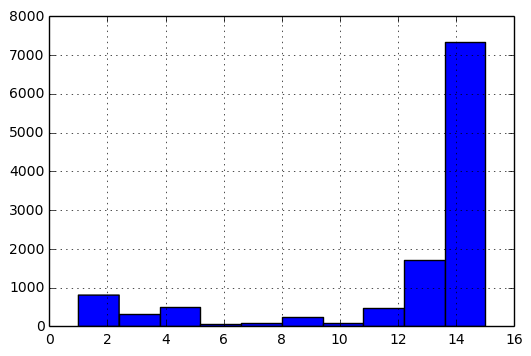

In [75]:
frecuencias["observaciones"].hist()